In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
def display_data(fake_data, train_data):
    fake_data = pd.DataFrame(fake_data)
    fake_data.head()

    train_data = pd.DataFrame(train_data)
    train_data.head()

    fake_data["label"] = 1
    train_data["label"] = 0
    
    data = pd.concat([fake_data, train_data])
    data.head()

    sns.pairplot(data, hue='label')

In [4]:
df = pd.read_csv('data/train.csv', header=None)
train_data = np.array(df.drop(labels=0, axis=1))

data_dim = train_data.shape[1]

power = 4

In [5]:
X = train_data ** (1/power)
mu = np.mean(X, axis=0)
cov = np.cov(X.T)
B = np.linalg.cholesky(cov)

In [6]:
def generate_data(mu, B, power, Z):    
    generated = (mu + np.dot(Z, B.T)) ** power
    return generated

In [7]:
mu_Z = np.zeros(train_data.shape[1])
cov_Z = np.eye(train_data.shape[1])

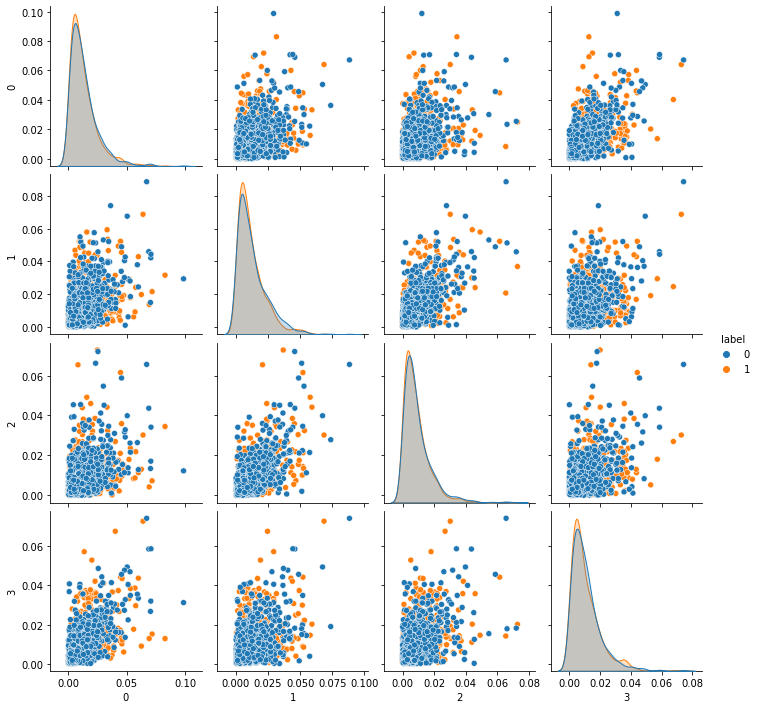

In [8]:

Z = np.random.multivariate_normal(mu_Z, cov_Z, train_data.shape[0])

generated = generate_data(mu, B, power, Z)
display_data(generated, train_data)

## Submission

In [9]:
try:
    Z = pd.read_csv('submission_data/noise.csv', header=None)
except Exception:
    Z = np.random.multivariate_normal(mu_Z, cov_Z, 410)

In [10]:
generated = generate_data(mu, B, power, Z)

In [11]:
pd.DataFrame(Z).to_csv('noise.csv', header=None, index=False)
pd.DataFrame(generated).to_csv('data.csv', header=None, index=False)

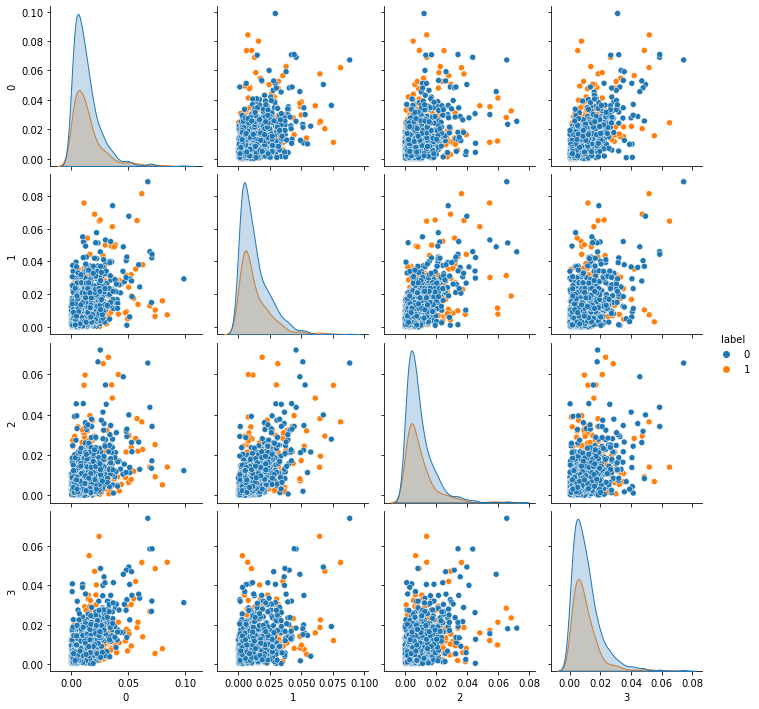

In [12]:
display_data(generated, train_data)